In [11]:
# %pip install scikit-learn

In [1]:
import pandas as pd

# Load refined dataset from CSV file into DataFrame
df = pd.read_csv('dataset/refined_data.csv')

In [2]:
from sklearn.model_selection import train_test_split

# Define target variable and feature set
target = df['HeartDisease'].values
features = df[df.columns.drop(['HeartDisease'])].values

# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


def evaluate(classifier):
    # Fit classifier on training data and make predictions
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

    # Perform cross validation
    cv = cross_val_score(classifier, x_train, y_train)
    print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

    # Compute ROC AUC score
    y_proba = classifier.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")

    # Compute F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1*100:.2f}%")

    # Display ROC curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("ROC Curve")
    plt.show()

    return {"report": report, "cv": cv, "roc_auc": roc_auc, "f1": f1}


Kernel: linear
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        88
           1       0.86      0.90      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 84.60% ± 1.41%
ROC AUC Score: 91.92%
F1 Score: 87.76%


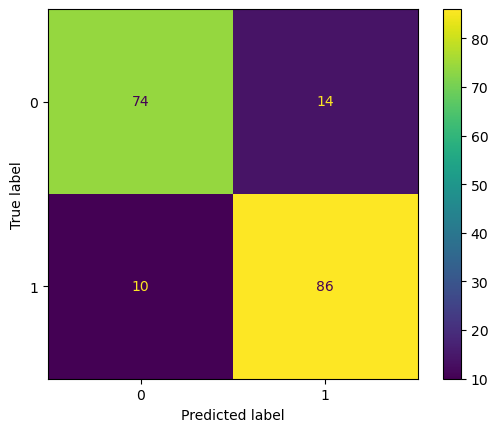

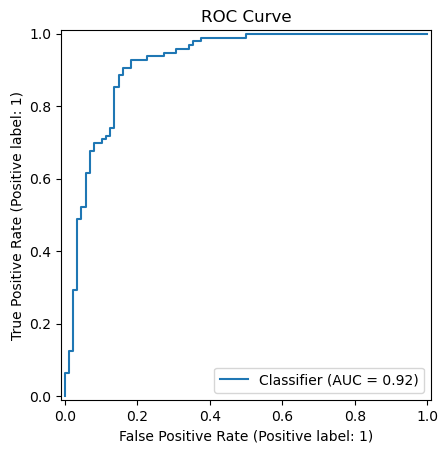

Kernel: Sigmoid
              precision    recall  f1-score   support

           0       0.61      0.60      0.61        88
           1       0.64      0.65      0.64        96

    accuracy                           0.62       184
   macro avg       0.62      0.62      0.62       184
weighted avg       0.62      0.62      0.62       184

Cross Validation (mean ± std): 72.07% ± 3.77%
ROC AUC Score: 72.31%
F1 Score: 64.25%


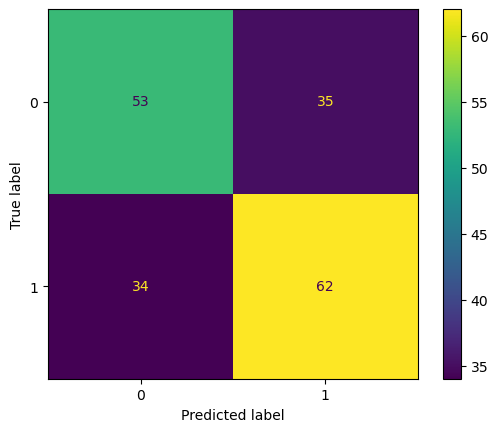

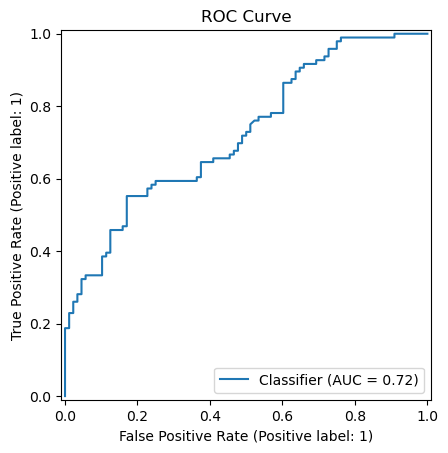

Kernel: rbf
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        88
           1       0.86      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 86.38% ± 0.43%
ROC AUC Score: 92.90%
F1 Score: 89.00%


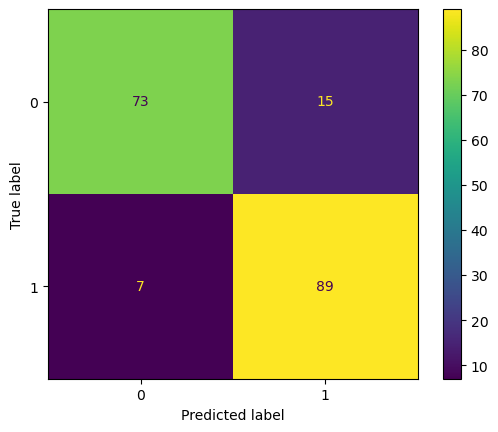

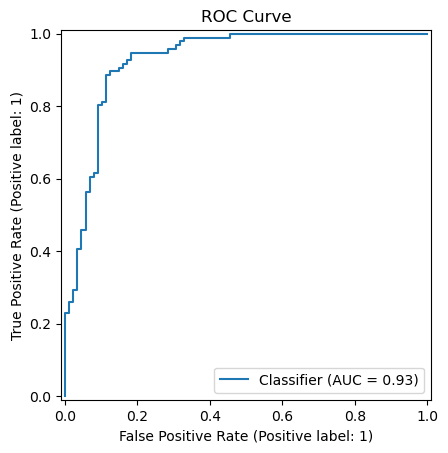

Kernel: Poly
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        88
           1       0.85      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

Cross Validation (mean ± std): 86.65% ± 1.74%
ROC AUC Score: 93.08%
F1 Score: 88.56%


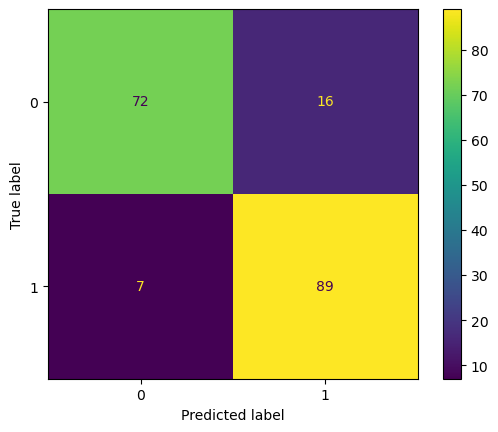

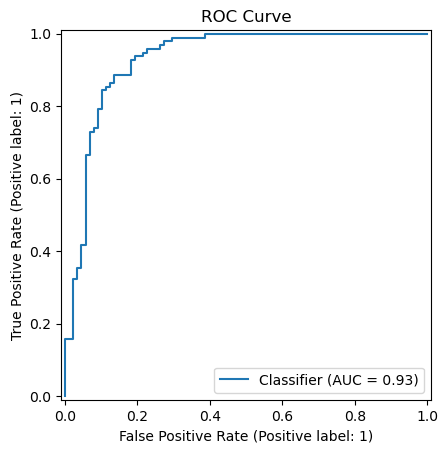

In [4]:
from sklearn.svm import SVC

kernel = []

# Evaluate classifier with linear kernel
print("Kernel: linear")
classifier = SVC(kernel='linear', probability=True)
kernel.append(evaluate(classifier)["f1"])

# Evaluate classifier with sigmoid kernel
print("Kernel: Sigmoid")
classifier = SVC(kernel='sigmoid', probability=True)
kernel.append(evaluate(classifier)["f1"])

# Evaluate classifier with rbf kernel
print("Kernel: rbf")
classifier = SVC(kernel='rbf', probability=True)
kernel.append(evaluate(classifier)["f1"])

# Evaluate classifier with polynomial kernel
print("Kernel: Poly")
classifier = SVC(kernel='poly', probability=True)
kernel.append(evaluate(classifier)["f1"])

C: 0.1
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        88
           1       0.84      0.90      0.87        96

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Cross Validation (mean ± std): 82.42% ± 1.12%
ROC AUC Score: 91.93%
F1 Score: 86.87%


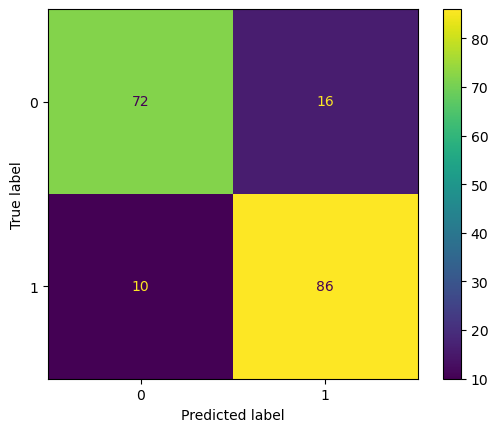

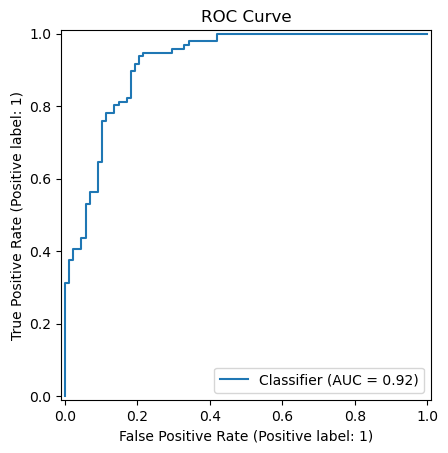

C: 1
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        88
           1       0.86      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 86.38% ± 0.43%
ROC AUC Score: 92.90%
F1 Score: 89.00%


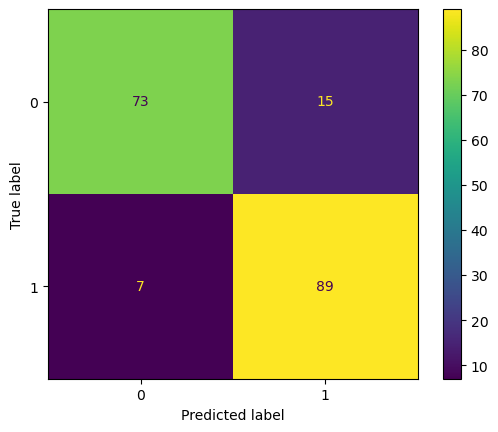

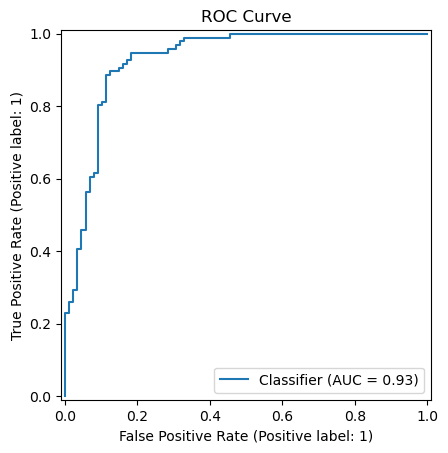

C: 10
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        88
           1       0.85      0.91      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 86.24% ± 2.48%
ROC AUC Score: 91.24%
F1 Score: 87.88%


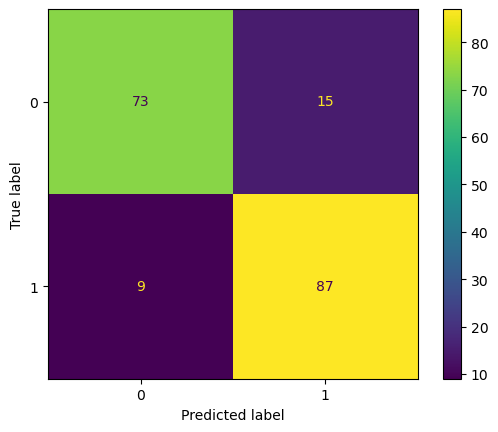

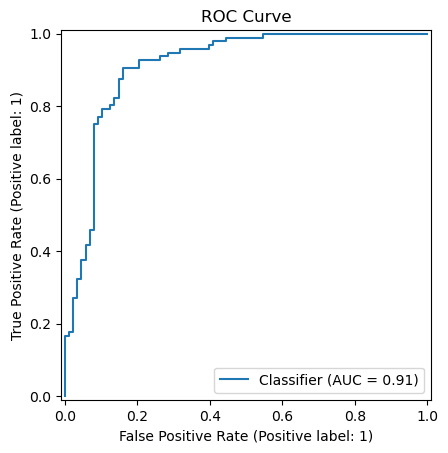

C: 100
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        88
           1       0.78      0.86      0.82        96

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

Cross Validation (mean ± std): 82.56% ± 0.98%
ROC AUC Score: 88.08%
F1 Score: 82.18%


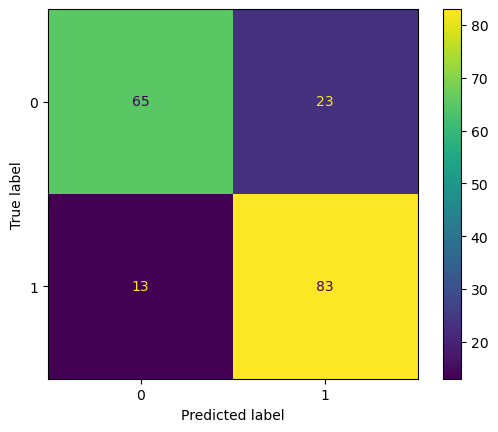

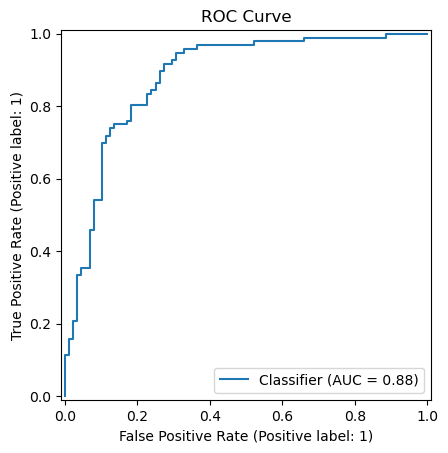

{'report': '              precision    recall  f1-score   support\n\n           0       0.83      0.74      0.78        88\n           1       0.78      0.86      0.82        96\n\n    accuracy                           0.80       184\n   macro avg       0.81      0.80      0.80       184\nweighted avg       0.81      0.80      0.80       184\n',
 'cv': array([0.82993197, 0.81632653, 0.81632653, 0.82312925, 0.84246575]),
 'roc_auc': np.float64(0.8808001893939394),
 'f1': 0.8217821782178217}

In [5]:
# Evaluate classifier with different values of C for rbf kernel
print("C: 0.1")
classifier = SVC(C=0.1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 1")
classifier = SVC(C=1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 10")
classifier = SVC(C=10, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 100")
classifier = SVC(C=100, kernel='rbf', probability=True)
evaluate(classifier)


C: 0.1
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        88
           1       0.84      0.90      0.87        96

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Cross Validation (mean ± std): 82.42% ± 1.12%
ROC AUC Score: 91.93%
F1 Score: 86.87%


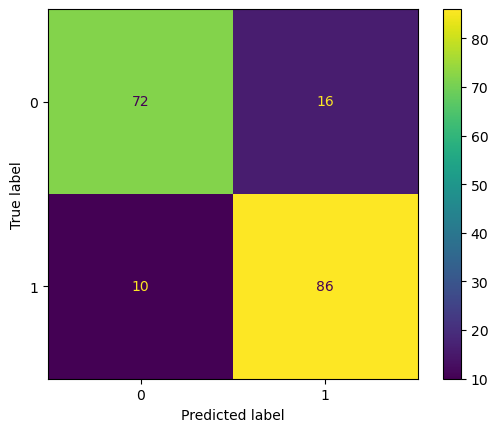

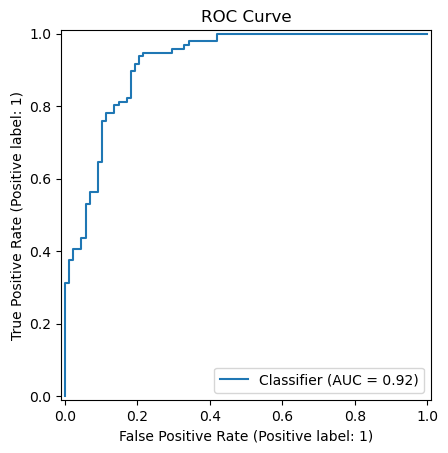

C: 1
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        88
           1       0.86      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 86.38% ± 0.43%
ROC AUC Score: 92.90%
F1 Score: 89.00%


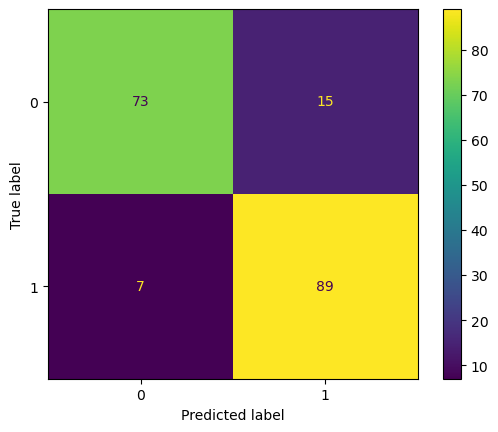

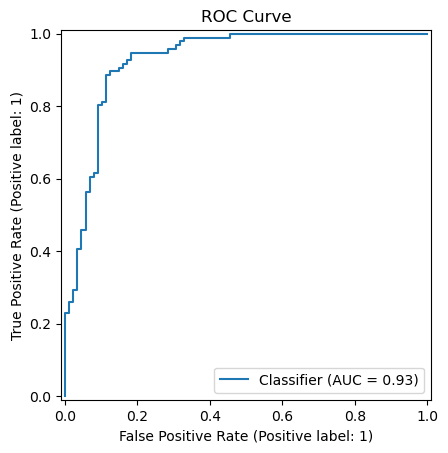

C: 2
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        88
           1       0.86      0.93      0.89        96

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 86.51% ± 1.16%
ROC AUC Score: 92.54%
F1 Score: 89.00%


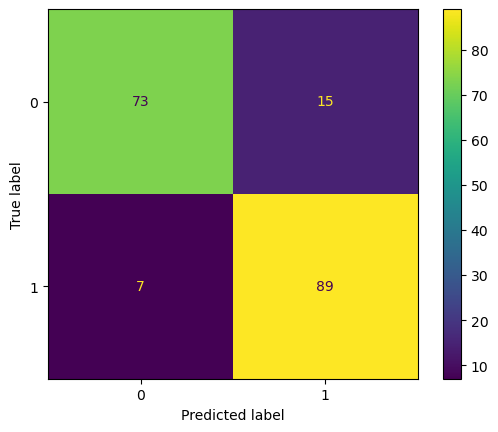

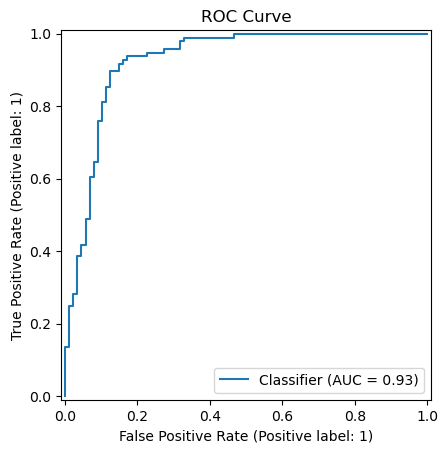

C: 3
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        88
           1       0.85      0.92      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 86.51% ± 2.33%
ROC AUC Score: 92.79%
F1 Score: 88.00%


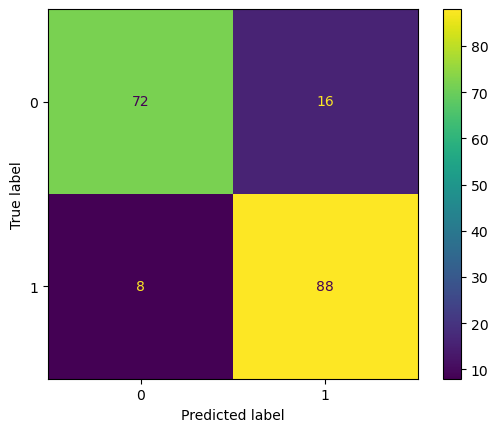

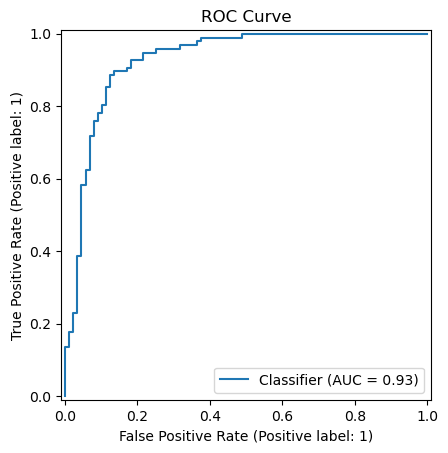

C: 4
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        88
           1       0.83      0.93      0.88        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 86.51% ± 2.67%
ROC AUC Score: 92.70%
F1 Score: 87.68%


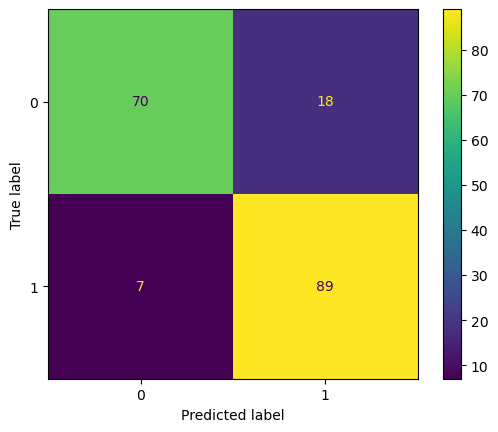

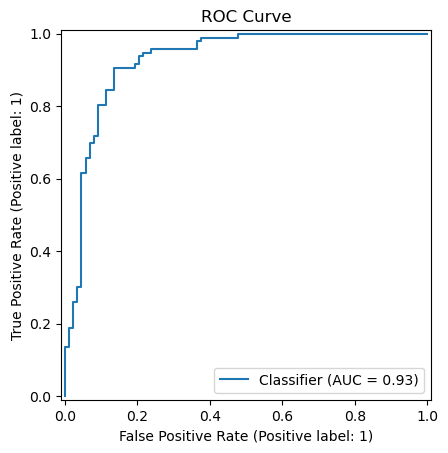

C: 5
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        88
           1       0.83      0.93      0.88        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 86.51% ± 2.70%
ROC AUC Score: 92.39%
F1 Score: 87.68%


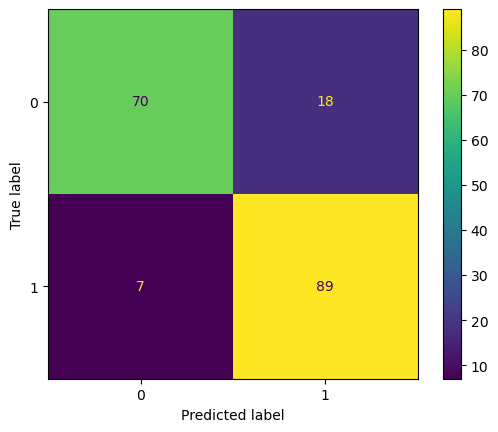

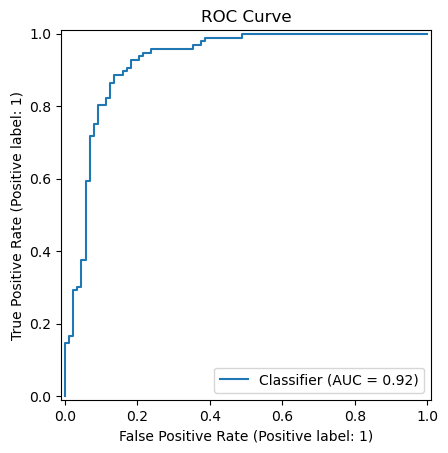

C: 6
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        88
           1       0.84      0.93      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 86.51% ± 2.70%
ROC AUC Score: 92.14%
F1 Score: 88.12%


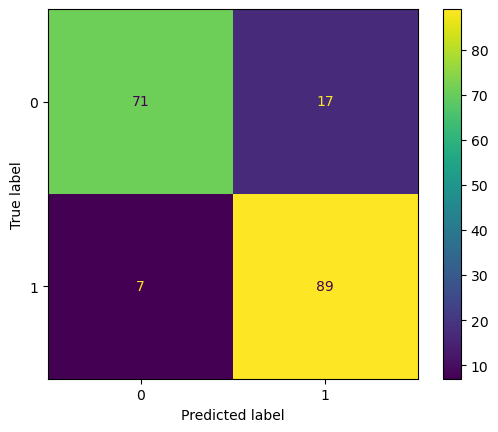

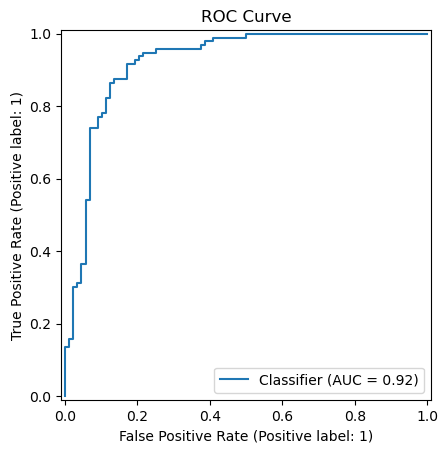

C: 7
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        88
           1       0.85      0.92      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.97% ± 2.67%
ROC AUC Score: 91.67%
F1 Score: 88.00%


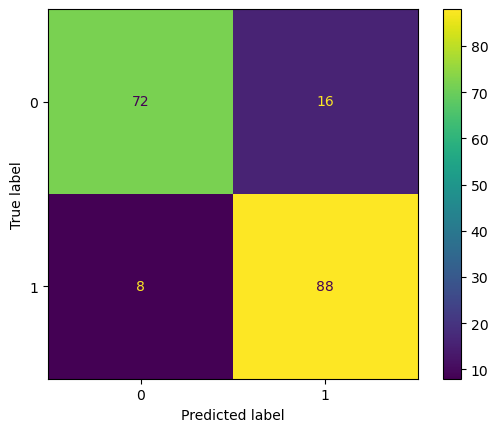

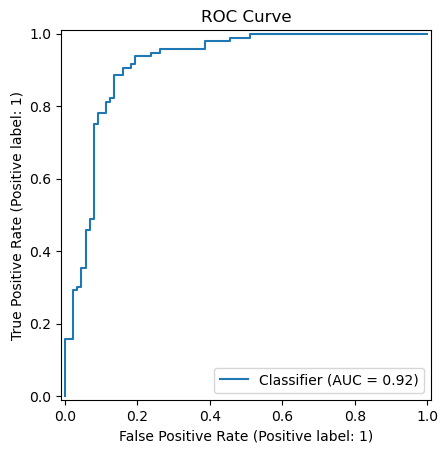

C: 8
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        88
           1       0.85      0.92      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 86.24% ± 2.70%
ROC AUC Score: 91.52%
F1 Score: 88.00%


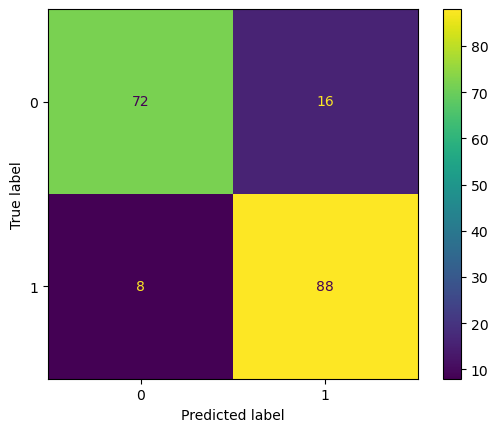

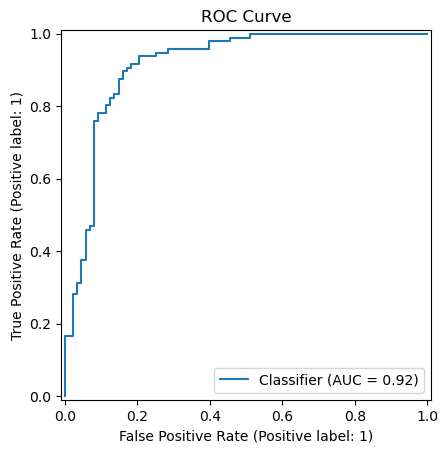

C: 9
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        88
           1       0.85      0.91      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 86.38% ± 2.43%
ROC AUC Score: 91.42%
F1 Score: 87.88%


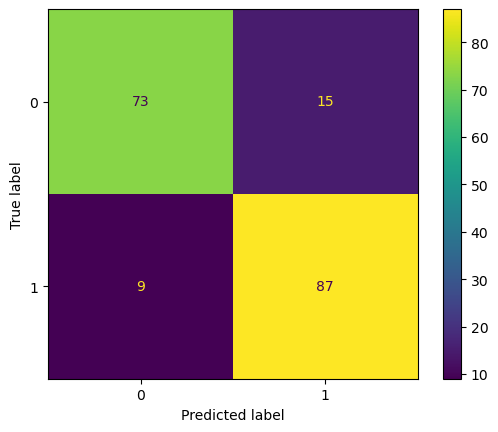

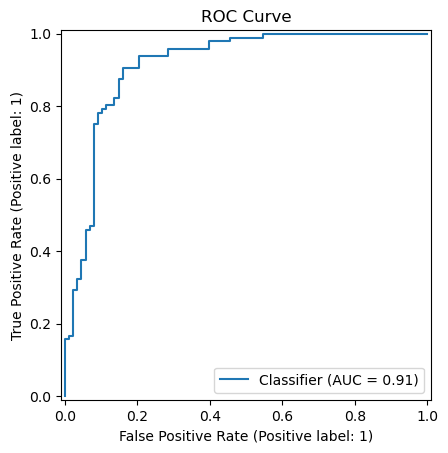

In [6]:
# Initialize list to store F1 scores for different values of C
c = []

# Evaluate classifier with rbf kernel for values of C from 0.1 to 9
for i in range(10):
    if i == 0:
        i = 0.1
    print(f"C: {i}")
    # Initialize classifier with current value of C
    classifier = SVC(C=i, kernel='rbf', probability=True)
    # Store F1 score from evaluation
    c.append(evaluate(classifier)["f1"])


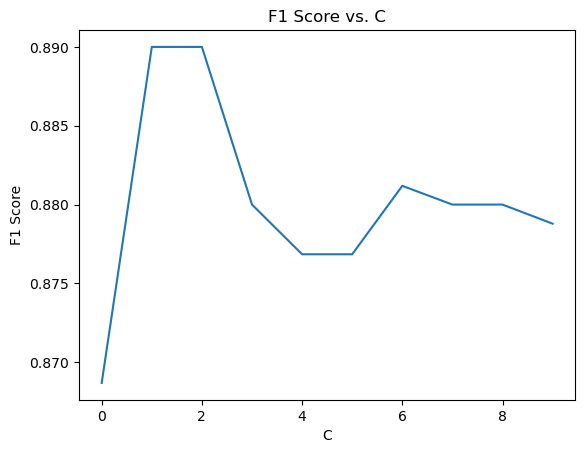

In [7]:
plt.plot(c)
plt.title('F1 Score vs. C')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

gamma: scale
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        88
           1       0.83      0.93      0.88        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 86.51% ± 2.67%
ROC AUC Score: 92.70%
F1 Score: 87.68%


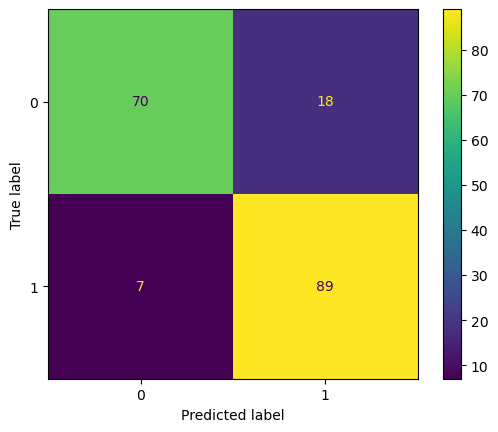

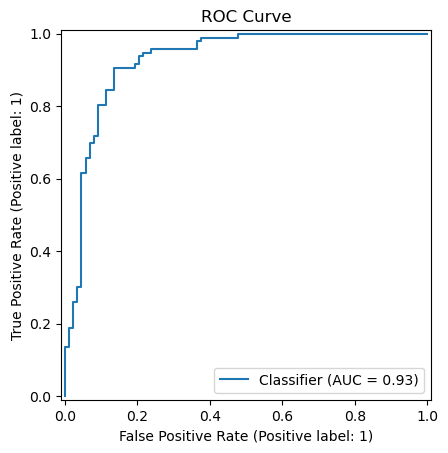

gamma: auto
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        88
           1       0.86      0.90      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 84.74% ± 2.29%
ROC AUC Score: 92.48%
F1 Score: 87.76%


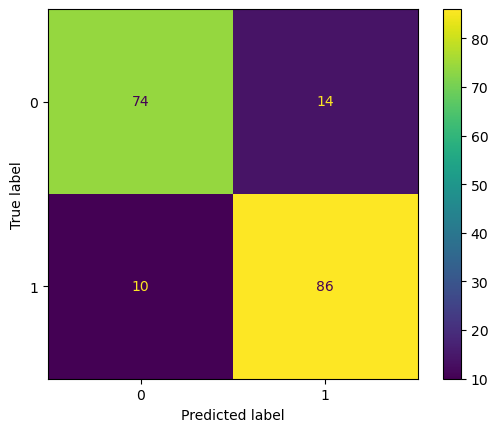

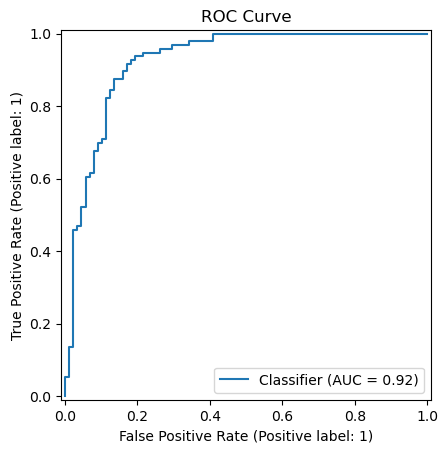

In [8]:
gamma = []
# Evaluate classifier with rbf kernel and gamma='scale'
print("gamma: scale")
classifier = SVC(C=4, kernel='rbf', gamma='scale',probability=True)
gamma.append(evaluate(classifier)['f1'])

# Evaluate classifier with rbf kernel and gamma='auto'
print("gamma: auto")
classifier = SVC(C=4, kernel='rbf', gamma='auto', probability=True)
gamma.append(evaluate(classifier)['f1'])


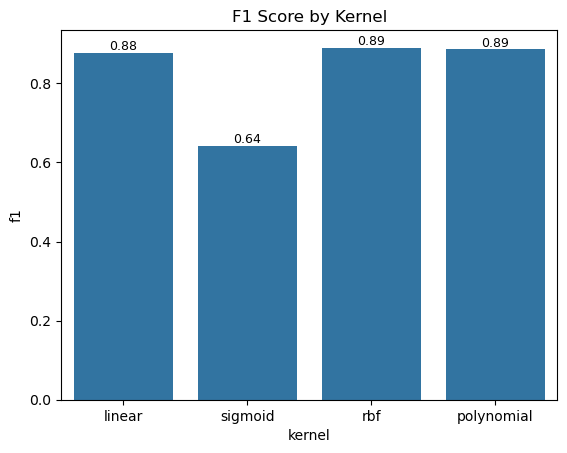

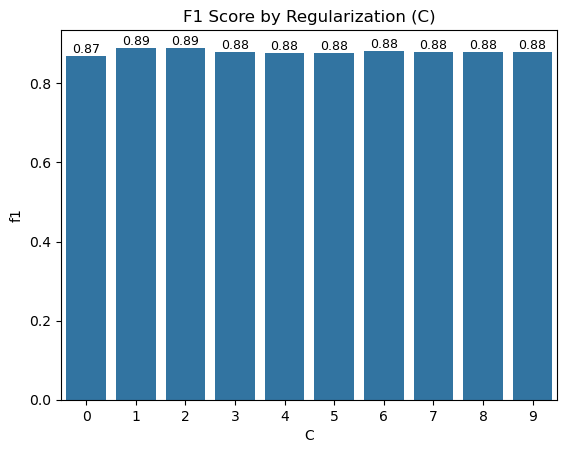

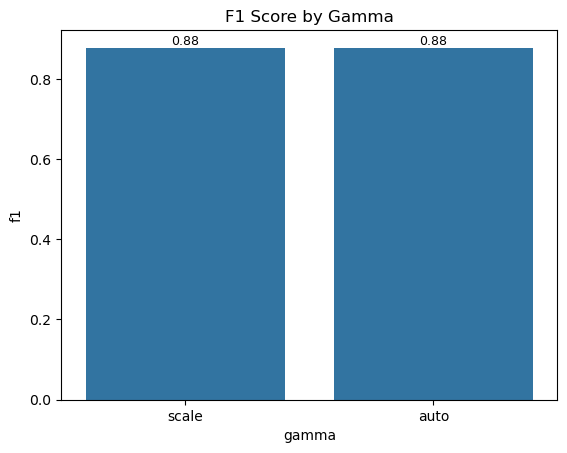

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define labels for different kernel, C, and gamma settings
kernel_label = ["linear", "sigmoid", "rbf", "polynomial"]
c_label = list(range(10))
gamma_label = ["scale", "auto"]

# Create result dictionaries for kernel, C, and gamma
kernel_results = [{"kernel": label, "f1": kernel[i]} for i, label in enumerate(kernel_label)]
c_results = [{"C": label, "f1": c[i]} for i, label in enumerate(c_label)]
gamma_results = [{"gamma": label, "f1": gamma[i]} for i, label in enumerate(gamma_label)]

df_kernel = pd.DataFrame(kernel_results)
df_c = pd.DataFrame(c_results)
df_gamma = pd.DataFrame(gamma_results)

# Function: Plots bar chart with F1 scores and labels
def plot_bar_with_labels(data, x, y, title):
    ax = sns.barplot(data=data, x=x, y=y)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)
    plt.title(title)
    plt.show()

plot_bar_with_labels(df_kernel, "kernel", "f1", "F1 Score by Kernel")
plot_bar_with_labels(df_c, "C", "f1", "F1 Score by Regularization (C)")
plot_bar_with_labels(df_gamma, "gamma", "f1", "F1 Score by Gamma")

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        78
           1       0.89      0.96      0.93       106

    accuracy                           0.91       184
   macro avg       0.92      0.90      0.91       184
weighted avg       0.92      0.91      0.91       184

Cross Validation (mean ± std): 85.56% ± 1.55%
ROC AUC Score: 94.00%
F1 Score: 92.73%


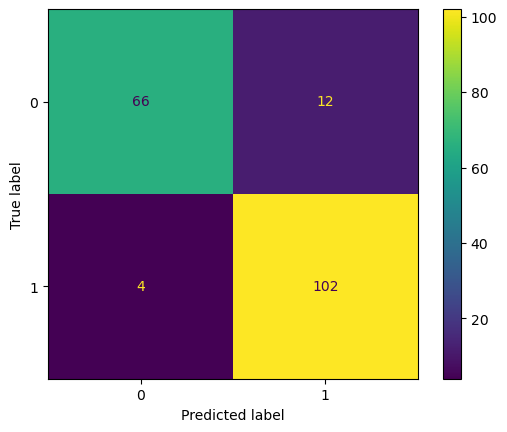

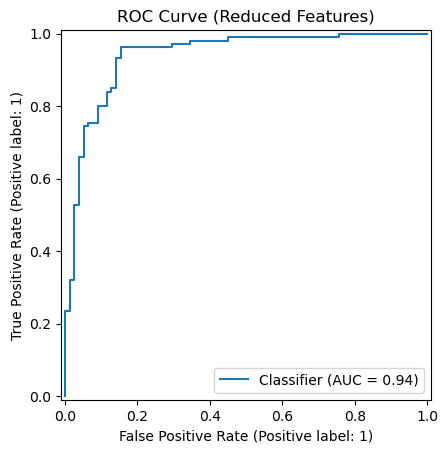

In [10]:
# Define target and features with reduced columns (excluding 'HeartDisease', 'RestingBP', 'RestingECG')
target_reduced = df['HeartDisease'].values
features_reduced = df[df.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values

# Split data into training and test sets (80% training, 20% test)
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(features_reduced, target_reduced, test_size=0.20)

# Initialize classifier with SVC and specific parameters (C=4, kernel='rbf', gamma='scale')
classifier = SVC(C=4, kernel='rbf', gamma='scale', probability=True)
classifier.fit(x_train_red, y_train_red)

# Predict using trained model 
y_pred_red = classifier.predict(x_test_red)
print(classification_report(y_test_red, y_pred_red))

# Generate confusion matrix 
cm = confusion_matrix(y_test_red, y_pred_red)
ConfusionMatrixDisplay(cm).plot()

# Perform cross-validation
cv = cross_val_score(classifier, x_train_red, y_train_red)
print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

# Compute ROC AUC score
y_proba_red = classifier.predict_proba(x_test_red)[:, 1]
roc_auc_red = roc_auc_score(y_test_red, y_proba_red)
print(f"ROC AUC Score: {roc_auc_red*100:.2f}%")

# Compute F1 score
f1_red = f1_score(y_test_red, y_pred_red)
print(f"F1 Score: {f1_red*100:.2f}%")

RocCurveDisplay.from_predictions(y_test_red, y_proba_red)
plt.title("ROC Curve (Reduced Features)")
plt.show()